In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")

# package use to convert string to other datatype e.g. list, dict, ...
import ast
# Packages for generating polygon
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

import importlib # to reload package dynamically.
#*******************************
# Custom package to process data
import utils
#*******************************

import warnings
warnings.filterwarnings("ignore")

<hr style="border: 0.5px dashed;">
<h2>Neighborhoods object</h2>
<p>
    This object contain Detroit neightborhood information which will be used to process 911 calls. Note that FID of 174 and 205 have the same name "Oak Grove". Therefore, need to update 911 calls dataframe with FID labels instead of using neighborhood name.
</p>

In [3]:
# Create Detroit neighborhood object
detroit = utils.neighborhoods.neighborhoods("data/raw/neighborhoods.csv")

<hr>
<h1 style="text-align: center">EDA</h1>

In [4]:
# Read in all 911 calls files (for year 2020 only)
files = [f"data/raw/Detroit_911_calls/911_Calls_2020_file{i}.csv" for i in range(4)]
df = pd.DataFrame()
for file in files:
    df = pd.concat([df, pd.read_csv(file, thousands=",")], axis=0)
df.shape

(986054, 27)

In [5]:
df

,X,Y,incident_id,agency,incident_address,zip_code,priority,callcode,calldescription,category,...,totalresponsetime,time_on_scene,totaltime,neighborhood,block_id,council_district,longitude,latitude,oid,ObjectId
0,-83.023396,42.339034,201936503569,DPD,Chene St & E Larned St,48207,3,935030,REMARKS,REMARKS,...,0.0,8.7,8.7,Elmwood Park,2.616352e+14,5.0,-83.023396,42.339034,2574156.0,NaN
1,-82.951111,42.437298,201936503571,DPD,Kelly Rd & Lappin St,48205,3,875030,HANGUP CALLS,HNGUP,...,NaN,NaN,NaN,Regent Park,2.616350e+14,3.0,-82.951111,42.437298,2574157.0,NaN
2,-83.195474,42.382234,201936503574,DPD,Glendale St & Whitcomb St,48227,1,352010,BURGLARY OCCUPIED RESD I/P,HI1 I/P,...,6.7,17.5,24.2,Schoolcraft Southfield,2.616354e+14,1.0,-83.195474,42.382234,2574158.0,NaN
3,-83.184107,42.432743,201936503576,DPD,Cambridge Ave & Stansbury St,48235,2,TS,TRAFFIC STOP,TRF STOP,...,0.0,30.3,30.3,Schaefer 7/8 Lodge,2.616354e+14,2.0,-83.184107,42.432743,2574159.0,NaN
4,-82.972233,42.416769,201936503579,DPD,Kilbourne Ave & Chalmers St,48213,3,935030,REMARKS,REMARKS,...,0.0,6.7,6.7,Outer Drive-Hayes,2.616350e+14,4.0,-82.972233,42.416769,2574160.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84452,-83.258296,42.429128,202032503881,DPD,W 7 Mile Rd & Lahser Rd,48219,2,345020,PERSON WITH WEAPON,WEAPON,...,NaN,NaN,NaN,Berg-Lahser,2.616354e+14,1.0,-83.258296,42.429128,NaN,84453.0
84453,-83.154077,42.386045,202032503884,DPD,Cherrylawn St & W Davison St,48238,2,TS,TRAFFIC STOP,TRF STOP,...,0.0,8.8,8.8,Davison-Schoolcraft,2.616354e+14,7.0,-83.154077,42.386045,NaN,84454.0
84454,-83.063929,42.414862,202032503886,DPD,E Davison St & Newbern St,48212,2,TS,TRAFFIC STOP,TRF STOP,...,0.0,7.0,7.0,North Campau,2.616351e+14,3.0,-83.063929,42.414862,NaN,84455.0
84455,-83.018099,42.434093,202032503888,DPD,E 7 Mile Rd & Antwerp St,48234,2,TS,TRAFFIC STOP,TRF STOP,...,0.0,10.7,10.7,Nortown,2.616351e+14,3.0,-83.018099,42.434093,NaN,84456.0


In [6]:
df.reset_index(drop=True).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986054 entries, 0 to 986053
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   X                  986054 non-null  float64
 1   Y                  986054 non-null  float64
 2   incident_id        986054 non-null  int64  
 3   agency             986054 non-null  object 
 4   incident_address   962778 non-null  object 
 5   zip_code           986054 non-null  object 
 6   priority           986054 non-null  object 
 7   callcode           986054 non-null  object 
 8   calldescription    986054 non-null  object 
 9   category           986054 non-null  object 
 10  call_timestamp     986054 non-null  object 
 11  precinct_sca       986054 non-null  object 
 12  respondingunit     609511 non-null  object 
 13  officerinitiated   986054 non-null  object 
 14  intaketime         978447 non-null  float64
 15  dispatchtime       920901 non-null  float64
 16  tr

In [7]:
# Drop duplicates (using incident_id)
df.drop_duplicates(subset=["incident_id"], inplace=True, ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 902523 entries, 0 to 902522
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   X                  902523 non-null  float64
 1   Y                  902523 non-null  float64
 2   incident_id        902523 non-null  int64  
 3   agency             902523 non-null  object 
 4   incident_address   880999 non-null  object 
 5   zip_code           902523 non-null  object 
 6   priority           902523 non-null  object 
 7   callcode           902523 non-null  object 
 8   calldescription    902523 non-null  object 
 9   category           902523 non-null  object 
 10  call_timestamp     902523 non-null  object 
 11  precinct_sca       902523 non-null  object 
 12  respondingunit     556605 non-null  object 
 13  officerinitiated   902523 non-null  object 
 14  intaketime         895549 non-null  float64
 15  dispatchtime       841275 non-null  float64
 16  tr

In [8]:
# Check the date and time of newest call.
df["call_timestamp"].tail()

902518    2020/11/20 23:20:57+00
902519    2020/11/20 23:22:25+00
902520    2020/11/20 23:22:59+00
902521    2020/11/20 23:23:02+00
902522    2020/11/20 23:23:18+00
Name: call_timestamp, dtype: object

<h3>1. Locations</h3>
<p> Visual check the locations of calls to see if they are actually in Detroit. </p>

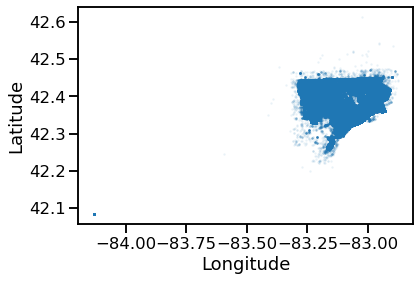

In [15]:
# Intersection locations of calls
plt.figure(figsize=(6,4))
plt.scatter(x=df["longitude"], y=df["latitude"], s=0.5, alpha=0.1)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

Strangely enough, most 911 calls records are inside Detroit city. However, there are some locations way outside of Detroit city. These are also likely the data that are null in the "neighborhood" column. These outsdie area calls should be removed.

<h3>2. Neighborhoods</h3>
<p>
    Check the list of neighborhoods in 911 calls data against the list of neighborhoods from city boundary data to make sure they match.
</p>

In [24]:
# Neighborhoods data from city.
# Create Detroit neighborhood object
detroit = utils.neighborhoods.neighborhoods("data/raw/neighborhoods.csv")
# Number of neighborhoods from city boundary data
print("Num of neighborhoods from city data:\t", detroit.num_nhood)
print("Num of neighborhoods from 911 calls:\t", df["neighborhood"].nunique())

Num of neighborhoods from city data:	 208
Num of neighborhoods from 911 calls:	 207


<p>
    Note that there is discrepancy between the number of neighborhoods from the city boundary data and 911 records.<br>
    After further looking, it was found that in city neighborhood records FID of 174 and 205 have the same neighborhood name "Oak Grove". However, 911 calls records do not include neighborhood FIDs but only their names. Therefore, need to update 911 calls dataframe with FID labels instead of using neighborhood names. For all calls from neighborhood "Oak Grove", they will be relabeled into two neighborhoods (with FID included).
</p>

<h3>3. Categories of calls</h3>

Categories:  201


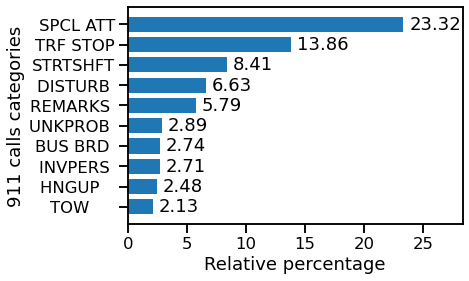

In [73]:
# 911 call categories
print("Categories: ", df["category"].nunique())
categories = df["category"].value_counts(normalize=True)*100
# Plot relative percent of call categories
# Only showing the top 10 categories
data = categories[:10][::-1] # ascending order
plt.figure()
plt.barh(y=data.index, width=data.values, height=0.75)
plt.xlim((0,max(data.values)+5))
plt.xlabel("Relative percentage")
plt.ylabel("911 calls categories")
# labels the bar with values
for i, v in enumerate(data.index):
    plt.text(data.values[i]+0.5, -0.25 + i, f"{data.values[i]:.2f}")
plt.show()

<p>
    Note that alot of 911 calls are for special attention (SPCL ATT). Further looking also show that for SPCL ATT, almost all the calls were initiated by field officers instead by local residents.<br>
    The 2nd highest calls category is traffic stops (TRF STOP). These calls are also all initiated by field officers.
</p>

<h3>4. Priority rating of calls</h3>

In [77]:
df["priority"].value_counts()

3    551030
2    221804
1     85674
4     29810
5     13790
P       253
        162
Name: priority, dtype: int64

Note that the priority column is of object type, due to value "P" and " ". 

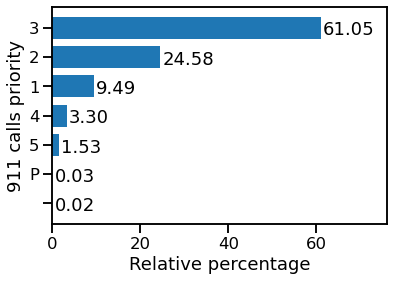

In [94]:
# 911 call categories
data = df["priority"].value_counts(normalize=True)*100
# Plot relative percent of call priority
data = data[::-1] # ascending order
plt.figure()
plt.barh(y=data.index, width=data.values, height=0.75)
plt.xlim((0,max(data.values)+15))
plt.xlabel("Relative percentage")
plt.ylabel("911 calls priority")
# labels the bar with values
for i, v in enumerate(data.index):
    plt.text(data.values[i]+0.5, -0.25 + i, f"{data.values[i]:.2f}")
plt.show()

Most of the 911 calls have priority 3. Also P and " " are also non-existence.

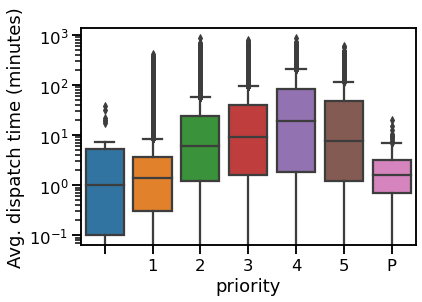

In [91]:
# Average dispatch time for each priority
# For calls NOT initiated by field offiers
data = df[df["officerinitiated"]=="No"]
plt.figure(figsize=(6,4))
sns.boxplot(data=data, x="priority", y="dispatchtime", order=sorted(data["priority"].unique()))
#plt.ylim((-10, 100))
plt.yscale("log")
plt.ylabel("Avg. dispatch time (minutes)")
plt.show()

Interestingly, the dispatchtime column has alot of outlier data points. Note the log scale of the y-axis. Dispite that, in general we see that calls with larger priority number also have longer dispatch time on average, except for priority=5 and priority=p. Due to the missing data dictionary, it is not known that priority " " and "P" represent. From this we can conclude that urgent calls are the ones with low priority numbers. Since the amount of calls with priority P and " " are so small <0.1%. These calls can also be removed from analysis.

<h3>5. Total response time</h3>

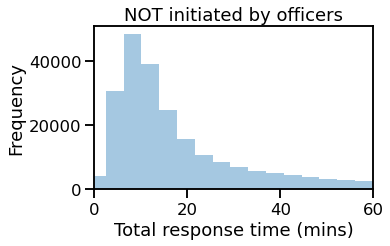

In [97]:
# totalresponsetime of call
data = df[df["officerinitiated"]=="No"]
plt.figure(figsize=(5,3))
sns.distplot(data.loc[(data.totalresponsetime<60), "totalresponsetime"], bins=30, kde=False)
plt.xlim((0,60))
plt.title("NOT initiated by officers")
plt.ylabel("Frequency")
plt.xlabel("Total response time (mins)")
plt.show()

On, average, total 911 calls response time is roughly 10 minutes, which is surprisingly long in my opinion.

<hr>
<h1 style="text-align:center;">Data Processing</h1>

<hr style="border: 0.5px dashed;">
<h2>Detroit 911 calls in 2020</h2>
<p> data source:
https://data.detroitmi.gov/datasets/911-calls-for-service-last-30-days
</p>

In [98]:
# Check nulls values
print(df.shape)
print("Percent of null values")
print("-"*50)
df.isna().mean()*100

(902523, 27)
Percent of null values
--------------------------------------------------


X                     0.000000
Y                     0.000000
incident_id           0.000000
agency                0.000000
incident_address      2.384870
zip_code              0.000000
priority              0.000000
callcode              0.000000
calldescription       0.000000
category              0.000000
call_timestamp        0.000000
precinct_sca          0.000000
respondingunit       38.327887
officerinitiated      0.000000
intaketime            0.772723
dispatchtime          6.786309
traveltime            7.770882
totalresponsetime     7.770882
time_on_scene         8.182839
totaltime             7.199041
neighborhood          3.855747
block_id              2.386089
council_district      3.514259
longitude             0.000000
latitude              0.000000
oid                  18.023363
ObjectId             81.976637
dtype: float64

<b>CLEANING NOTES:</b>
<ul>
    <li>Drop <code>incident_address</code>, <code>council_district</code>, and <code>block_id</code> since we are looking at neighborhood level</li>
    <li>Drop <code>respondingunit</code> as not relevant for this study.</li>
    <li>Remove calls outside of Detroit neighborhoods</li>
    <li>Several columns string value have leading and trailing white spaces.</li>
    <li><code>priority</code> has non-numerical value (p, and " "). Maybe should drop these.</li>
    <li><code>call_timestamp</code> should be <code>datetime64</code>.</li>
    <li>Remove calls there were hung-up, <code>category</code> = <code>HNGUP</code></li>
</ul>
<b>Category notes:</b>
<ul>
    <li><code>STRTSHFT</code>: Beginnin of shift change information. Initiated by officers</li>
    <li><code>TRF STOP</code>: Calls about traffic stops, initiated by officers.</li>
    <li><code>REMARKS</code>: Remarks by officers.</li>
    <li><code>BUS BRD</code>: Bus boarding.</li>
    <li><code>TOW</code>: About towing.</li>
    <li><code>HNGUP</code>: Calls that were hung-up.</li>
    <li><code>BITE1</code>: Animal bite</li>
</ul> 
<p>
    Not all categories were checked for relevant due to the large number of unique call categories (~ 192). The major categories were checked manually.
</p>

In [3]:
# calls data preprocessing class
# DESCRIPTION OF THE PROCESSING STEPS ARE SHOWN BELLOW
# Create data processing object for Detroit
data_proc = utils.preprocessing.Preprocess(detroit)

In [27]:
# 911 calls files to process
files = [f"data/raw/Detroit_911_calls/911_Calls_2020_file{i}.csv" for i in range(3)]
# Output file
out_file = "data/cleaned/911_Calls_2020_cleaned.csv"
# Process files
data_proc.process_calls(files, out_file=out_file)

data/Detroit_911_calls/911_Calls_2020_file0.csv
Raw shape:  (739858, 26)
Keep:  (467082, 14)
--------------------------------------------------
data/Detroit_911_calls/911_Calls_2020_file1.csv
Raw shape:  (78422, 26)
Keep:  (47446, 14)
--------------------------------------------------
data/Detroit_911_calls/911_Calls_2020_file2.csv
Raw shape:  (83317, 26)
Keep:  (49025, 14)
--------------------------------------------------
Write to:  data/Detroit_911_calls/911_Calls_2020_cleaned.csv


In [25]:
# Dataframe
calls = pd.read_csv("data/cleaned/911_Calls_2020_cleaned.csv", thousands=",")
calls["call_timestamp"] = calls["call_timestamp"].astype("datetime64")
calls.set_index("call_timestamp", inplace=True)

In [26]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 523637 entries, 2020-01-01 00:01:40 to 2020-11-01 00:46:42
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   incident_id        523637 non-null  int64  
 1   officerinitiated   523637 non-null  object 
 2   priority           523637 non-null  int64  
 3   calldescription    523637 non-null  object 
 4   category           523637 non-null  object 
 5   intaketime         519042 non-null  float64
 6   dispatchtime       490736 non-null  float64
 7   traveltime         483089 non-null  float64
 8   totalresponsetime  483089 non-null  float64
 9   time_on_scene      481035 non-null  float64
 10  totaltime          487704 non-null  float64
 11  longitude          523637 non-null  float64
 12  latitude           523637 non-null  float64
 13  FID_nhood          523637 non-null  object 
dtypes: float64(8), int64(2), object(4)
memory usage: 59.9+ MB


<hr>
<h1 style="text-align: center">Feature engineering</h1>

<h2>Attention level</h2>
<p>A neighborhood attention level is defined as:<p>

$$Attention~level = \left(\frac{\#~of~calls}{avg.~priority + 1}\right)+1$$

In [5]:
#*******************************************************
# IMPORT CUSTOM DATA OBJECT, ANALYSIS TOOLS AND FUNCTIONS
#********************************************************
from analysis import Analysis as ana
from analysis import TSData

In [6]:
# selected neighborhood
#nhoods = "19,Warrendale"
nhoods = "all"
# generate attention level data with 3-hour increments
att_level = ana.get_att_level(calls, nhoods, freq="3H", data_proc=data_proc)
# create a master data object
att_level = TSData.TSData(att_level)